<a href="https://colab.research.google.com/github/alda1rx/Tareas_EstadisticaAplicada_21/blob/main/LAHM_1616940_EstadisticaAplicadaG51_Tarea3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 10.4 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [10]:
import numpy as np
import pandas as pd 
import yfinance as yf
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
walmex = yf.download('WALMEX.MX', 
                       start='2014-01-01', 
                       end='2017-12-31',
                       progress=False)

In [ ]:
walmex.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,34.290001,34.389999,33.189999,33.419998,26.425303,12895411
2014-01-03,33.509998,33.590000,33.160000,33.250000,26.290886,8764140
2014-01-06,33.580002,33.590000,32.599998,32.849998,25.974604,10102481
2014-01-07,32.930000,33.549999,32.810001,33.380001,26.393675,18559062
2014-01-08,33.439999,33.570000,32.860001,32.889999,26.006227,17925028


In [ ]:
walmex.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-22,46.400002,46.500000,45.869999,46.009998,42.662647,5321344
2017-12-26,45.900002,46.389999,45.770000,45.950001,42.607014,10207072
2017-12-27,46.180000,46.889999,46.180000,46.810001,43.404449,7449128
2017-12-28,46.810001,47.290001,46.169998,47.189999,43.756798,5411119
2017-12-29,47.290001,48.500000,47.110001,48.189999,44.684044,11568658


In [12]:
##renombar columna
walmex.rename(columns = {'Adj Close':'adj_close'}, inplace=True)

In [13]:
## calcular los retornos
walmex['retorno_simple'] = walmex.adj_close.pct_change()

In [14]:
walmex.tail()

,Open,High,Low,Close,adj_close,Volume,retorno_simple
Date,,,,,,,
2017-12-22,46.400002,46.500000,45.869999,46.009998,42.662643,5321344,-0.010963
2017-12-26,45.900002,46.389999,45.770000,45.950001,42.607021,10207072,-0.001304
2017-12-27,46.180000,46.889999,46.180000,46.810001,43.404446,7449128,0.018716
2017-12-28,46.810001,47.290001,46.169998,47.189999,43.756798,5411119,0.008118
2017-12-29,47.290001,48.500000,47.110001,48.189999,44.684044,11568658,0.021191


In [16]:

print('Rango de fechas:', min(walmex.index.date), '-', max(walmex.index.date))
print('Numero de observaciones:', walmex.shape[0])
print(f'Media: {walmex.retorno_simple.mean():.4f}')
print(f'Mediana: {walmex.retorno_simple.median():.4f}')
print(f'Mínimo: {walmex.retorno_simple.min():.4f}')
print(f'Máximo: {walmex.retorno_simple.max():.4f}')
print(f'Desviación Estándar: {walmex.retorno_simple.std():.4f}')
print(f'Skewness (símetría): {walmex.retorno_simple.skew():.4f}') ## que tan centrada esta la dist
print(f'Kurtosis: {walmex.retorno_simple.kurtosis():.4f}')     ## que tan alta esta la dist


Rango de fechas: 2014-01-02 - 2017-12-29
Numero de observaciones: 1005
Media: 0.0006
Mediana: 0.0006
Mínimo: -0.0762
Máximo: 0.0875
Desviación Estándar: 0.0142
Skewness (símetría): 0.2433
Kurtosis: 3.6359


Graficar

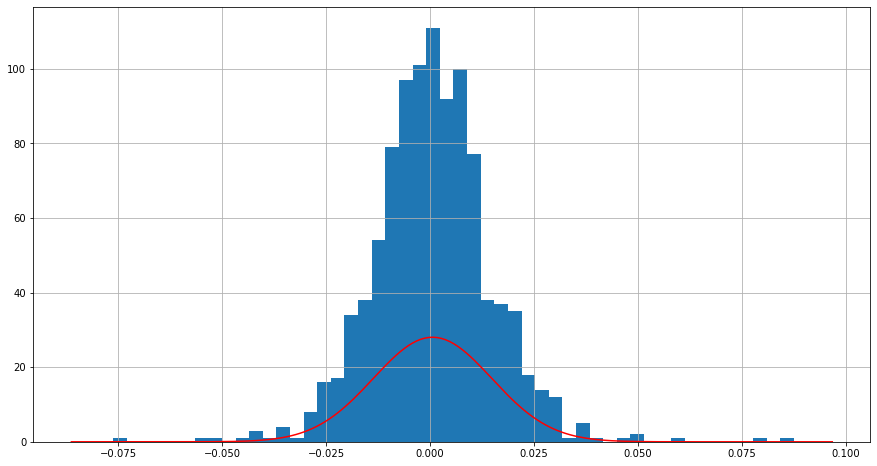

In [ ]:
## graficamos
walmex['retorno_simple'].hist(bins=50)  ## histograma
plt.show()


### Con base en sus conocimientos de probabilidad y estadística, que puede comentar acerca de:
* normalidad de los log-retornos de las acciones de Walmart Mex
* ¿Qué mensaje dan la asimetría, la curtosis, la media, y la mediana respecto al retorno que ofrece una acción de Walmart de México?

La media es el dato promedio que tienen los datos
la mediana es el dato que queda en la parte central de todos 
La asimetria nos representa que tanto pueden alejarse los valores de la media ya sea de manera negativa(lado izquierdo) o positiva(lado derecho)
La curtosis, nos indica el lado hacia donde estan concentrados los datos tomando en cuenta la asimetria 

### Construye un intervalo de confianza de 90% para la media del rendimiento de  las acciones de walmex

Nota que la varianza poblacional es desconocida 

In [55]:
## aqui va tu código
import scipy.stats as stats
z = round(stats.norm.ppf(1-.1/2), 4) #sacar el valor de la Z y redondear a solo 4 decimales
media = round(walmex.retorno_simple.mean(), 4)
s = round(walmex.retorno_simple.std(), 4)
n = walmex.shape[0]
E = round(z*s/np.sqrt(n), 6) #Error
print('El error es = ', E)

## usa print para mostrar el intervalo de confianza construido
print('El intervalo de confianza es = ', round(media-E, 6), ' < Miu < ', round(media+E, 6))


El intervalo de confianza es =  -0.000137  < Miu <  0.001337


### Prueba la hipotesis de que el rendimiento promedio de las acciones de walmart de méxico es cero